## Assignment 1: Descriptive Analytics for Numerical Columns

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


## Load dataset

In [2]:
df = pd.read_csv("sales_discounts.csv")
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


## Numeric columns

In [3]:
numerical_cols = df.select_dtypes(include="number").columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [4]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


## Calculations 

In [5]:
 df.select_dtypes(include="number").mean()

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [6]:
 df.select_dtypes(include="number").mode().iloc[0]

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [7]:
 df.select_dtypes(include="number").median()

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [8]:
df.select_dtypes(include='number').std()

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

### Interpretation of Descriptive Statistics
Volume: Most transactions include 4 to 5 products. The quantity sold is fairly consistent with some variation.

Average Price: While the average price is high due to expensive items, most products are actually priced much lower. This means a few costly products increase the average.

Total Sales Value: There is a big difference in total sales between transactions. A few high-value sales increase the overall average.

Discount Rate (%): Most discounts are between 13% and 18%, but some are as low as 5% or very high, depending on the product.

Discount Amount: The amount of discount given varies a lot. Expensive items have higher discount amounts.

Net Sales Value: The earnings after discounts also show a wide range because some products are much costlier than others.

Overall Insight: The dataset has a mix of consistent values and extreme ones. This variation is important to notice before moving to data modeling or predictions.

## Data Visualization

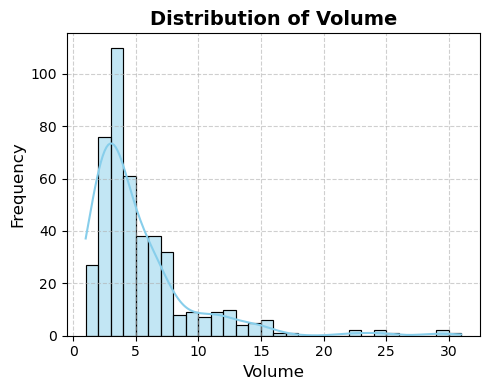

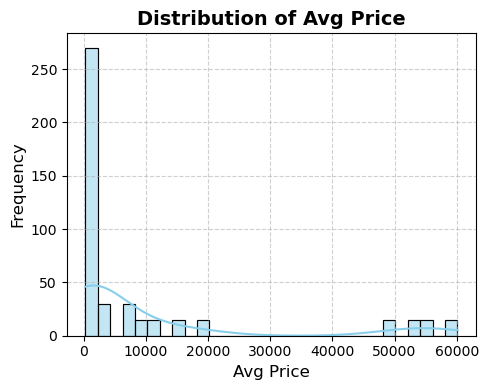

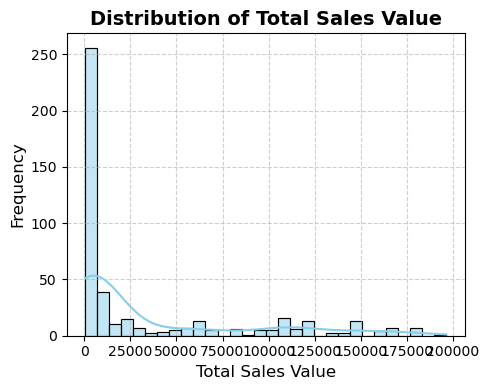

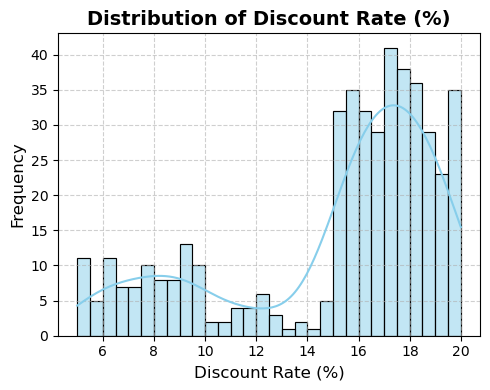

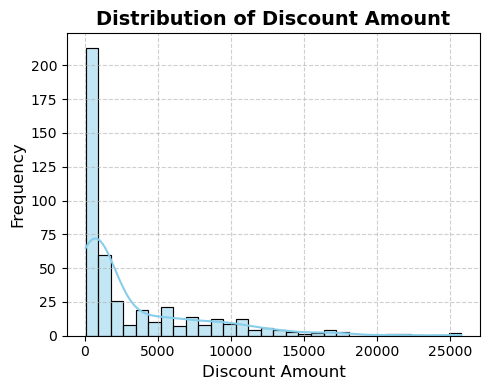

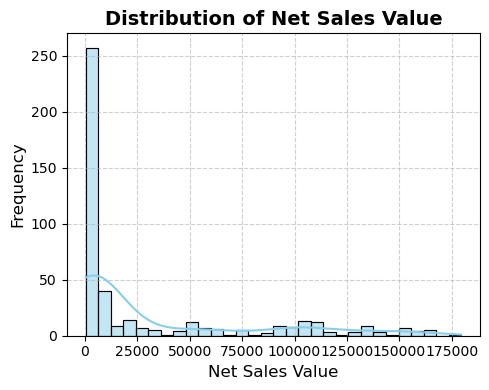

In [9]:
#histogram
for col in numerical_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

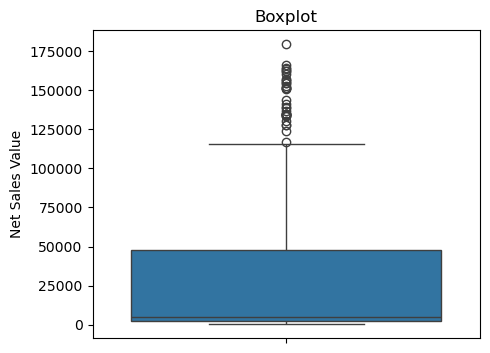

In [10]:
#boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(y=df[col])
plt.title("Boxplot")
plt.show()


In [11]:
categorical_cols = df.select_dtypes(include='object').columns


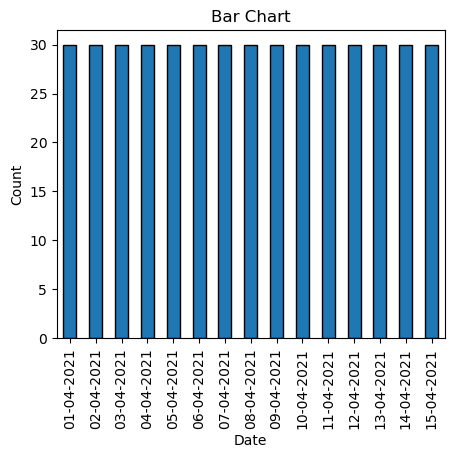

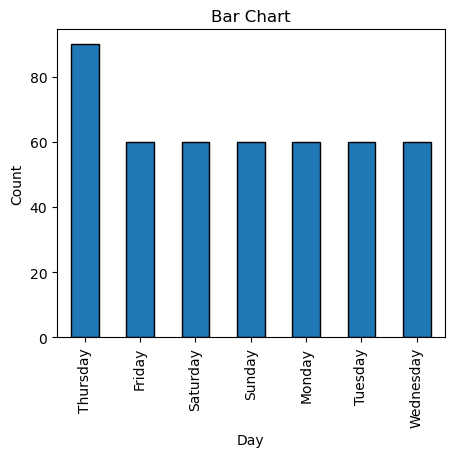

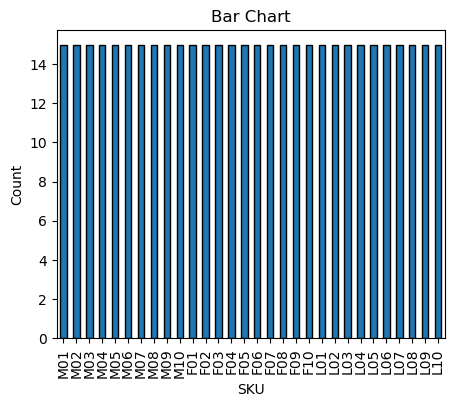

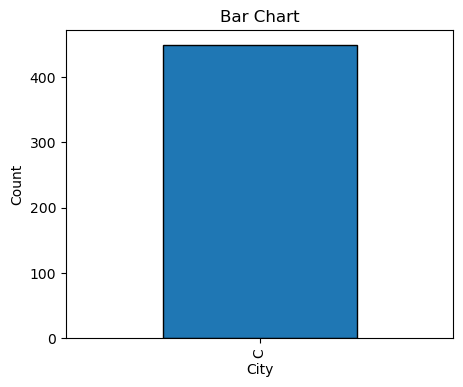

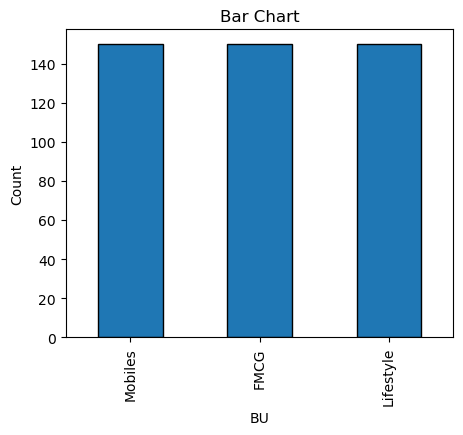

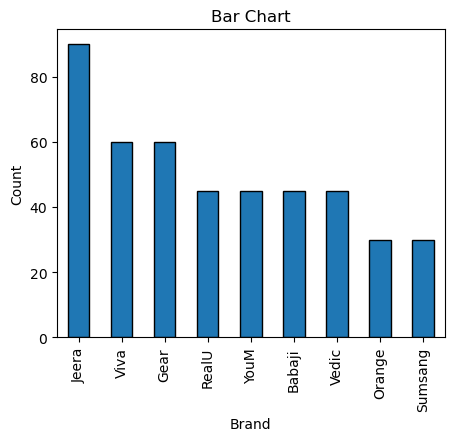

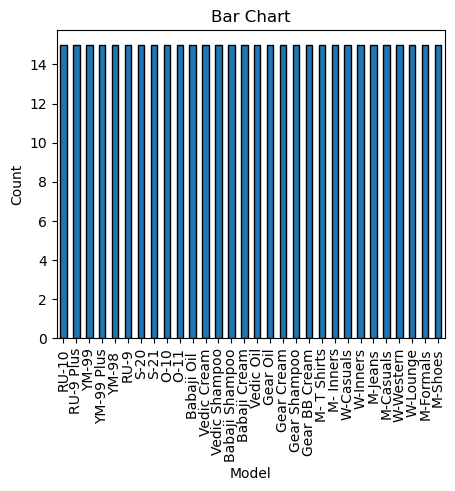

In [12]:
# bar Chart
for col in categorical_cols:
    plt.figure(figsize=(5, 4))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title("Bar Chart")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


## Standardization of Numerical Variables

In [13]:
df.shape

(450, 13)

In [14]:
q1 = df["Volume"].quantile(0.25)
q3 = df["Volume"].quantile(0.75)

In [15]:
IQR = q3-q1

In [16]:
min_range = q1-(1.5*IQR)
max_range = q3-(1.5*IQR)
min_range,max_range

(np.float64(-1.5), np.float64(1.5))

In [17]:
new_df = df[df["Volume"]<=max_range]

In [18]:
new_df.shape

(27, 13)

In [19]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [20]:
min_range = df["Volume"].mean() - (3*df["Volume"].std())
max_range = df["Volume"].mean() + (3*df["Volume"].std())

In [21]:
min_range,max_range

(np.float64(-7.628140506975111), np.float64(17.761473840308444))

In [22]:
new_df = df[df["Volume"]<=max_range]

In [23]:
new_df.shape

(442, 13)

## Standardization (Z-score Normalization)

Z-score standardization is used to bring all numerical columns on the same scale.  

\[
z = \frac{x - \mu}{\sigma}
\]

- \(x\): actual value  
- \(\mu\): mean of the column  
- \(\sigma\): standard deviation  

After standardization, each column has mean = 0 and std = 1.


In [24]:
z_score = (df["Volume"] - df["Volume"].mean())/(df["Volume"].std())

In [25]:
df["z_score"] = z_score

In [26]:
df[df["z_score"]<3]

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,z_score
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180,2.347417
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039,1.165831
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843,0.456880
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298,0.220563
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770,-0.488389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127,-0.724706
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758,0.220563
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394,-0.724706
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174,-0.488389


## Standardize

In [27]:
ss = StandardScaler()
ss.fit(df[["Volume"]])

StandardScaler()

In [28]:
df["Volume_ss"] = pd.DataFrame(ss.transform(df[["Volume"]]),columns=["x"])

In [29]:
df.head(3)

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,z_score,Volume_ss
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180,2.347417,2.350029
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039,1.165831,1.167129
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843,0.456880,0.457388


In [30]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,z_score,Volume_ss
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,4.500000e+02,4.500000e+02
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131,4.934325e-17,6.118562e-17
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624,1.000000e+00,1.001113e+00
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801,-9.610229e-01,-9.620925e-01
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645,-4.883887e-01,-4.889322e-01
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059,-2.520716e-01,-2.523521e-01
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852,2.205626e-01,2.208081e-01
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049,6.128490e+00,6.135311e+00


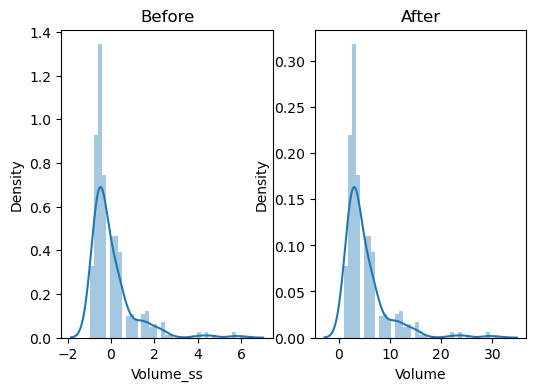

In [31]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["Volume_ss"])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df["Volume"])
plt.show()

## One Hot Encoded

In [32]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [33]:
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,z_score,Volume_ss,Date_02-04-2021,Date_03-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,2.347417,2.350029,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,1.165831,1.167129,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,0.456880,0.457388,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,0.220563,0.220808,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,-0.488389,-0.488932,False,False,...,False,False,False,False,False,False,False,True,False,False


## Key Findings
- The dataset contains both numerical and categorical variables.
- Statistical measures helped in understanding central tendency and variability.
- Visualizations revealed potential outliers and skewed distributions.
- Standardization brought all numerical features to the same scale.
- One-hot encoding converted categorical variables for machine learning readiness.


## Importance of Preprocessing
Proper data preprocessing improves the quality and performance of ML models. Standardization and encoding make data consistent, scalable, and algorithm-friendly.
